<a href="https://colab.research.google.com/github/np03cs4a240102-lang/Concepts-and-Technologies-of-AI/blob/main/Worksheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#ToDo1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv("/content/drive/MyDrive/AI Workshop/student.csv")

# Top & Bottom 5 rows
print(data.head())
print(data.tail())

# Dataset info
print(data.info())

# Descriptive statistics
print(data.describe())


   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62
     Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None
              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60.750000    58.000000
50%      68.000000    70.000000    69.500000
75%      78.000000    81.000000 

In [6]:
#ToDo2
X = data[['Math', 'Reading']].values
Y = data['Writing'].values



In [7]:
#ToDo3
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [8]:
#ToDo4
def cost_function(X, Y, W):
    """
    Computes Mean Squared Error cost
    """
    n = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1 / (2 * n)) * np.sum((Y_pred - Y) ** 2)
    return cost

In [9]:
#ToDo5
X_test_case = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_case = np.array([3, 7, 11])
W_test_case = np.array([1, 1])

cost = cost_function(X_test_case, Y_test_case, W_test_case)

if cost == 0:
    print("Proceed Further")
else:
    print("Something went wrong")

print("Cost:", cost)

Proceed Further
Cost: 0.0


In [10]:
#ToDo6
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Gradient Descent for Linear Regression
    """
    m = len(Y)
    cost_history = []

    for _ in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y_pred - Y
        dw = (1 / m) * np.dot(X.T, loss)
        W = W - alpha * dw
        cost_history.append(cost_function(X, Y, W))

    return W, cost_history

In [11]:
#ToDo7
np.random.seed(0)

X_rand = np.random.rand(100, 3)
Y_rand = np.random.rand(100)
W_rand = np.random.rand(3)

alpha = 0.01
iterations = 1000

final_params, cost_history = gradient_descent(
    X_rand, Y_rand, W_rand, alpha, iterations
)

print("Final Parameters:", final_params)
print("Final Cost:", cost_history[-1])

Final Parameters: [0.20551667 0.54295081 0.10388027]
Final Cost: 0.05435492255484332


In [12]:
#ToDo8
def rmse(Y, Y_pred):
    rmse = np.sqrt(np.mean((Y - Y_pred) ** 2))
    return rmse

In [13]:
#ToDo9
def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    r2_score = 1 - (ss_res / ss_tot)
    return r2_score

Final Weights: [0.34811659 0.64614558]
Cost History (First 10): [np.float64(2013.165570783755), np.float64(1640.286832599692), np.float64(1337.0619994901588), np.float64(1090.4794892850578), np.float64(889.9583270083234), np.float64(726.8940993009545), np.float64(594.2897260808594), np.float64(486.4552052951635), np.float64(398.7634463599484), np.float64(327.4517147324688)]
RMSE: 5.2798239764188635
R2 Score: 0.8886354462786421


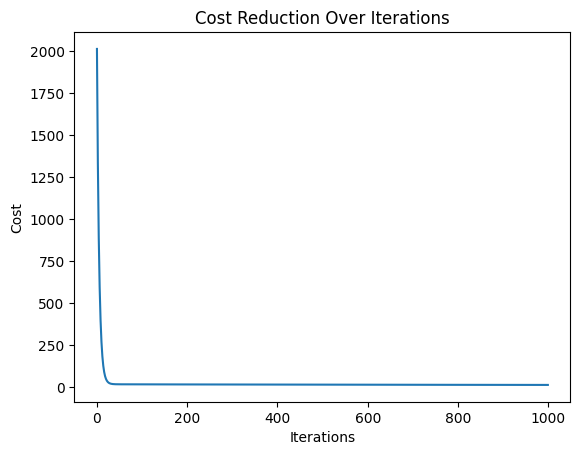

In [14]:
#ToDo10
def main():
    # Load data
    data = pd.read_csv("/content/drive/MyDrive/AI Workshop/student.csv")

    # Features & Target
    X = data[['Math', 'Reading']].values
    Y = data['Writing'].values

    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42
    )

    # Initialize weights
    W = np.zeros(X_train.shape[1])
    alpha = 0.00001
    iterations = 1000

    # Train model
    W_optimal, cost_history = gradient_descent(
        X_train, Y_train, W, alpha, iterations
    )

    # Predictions
    Y_pred = np.dot(X_test, W_optimal)

    # Evaluation
    model_rmse = rmse(Y_test, Y_pred)
    model_r2 = r2(Y_test, Y_pred)

    # Results
    print("Final Weights:", W_optimal)
    print("Cost History (First 10):", cost_history[:10])
    print("RMSE:", model_rmse)
    print("R2 Score:", model_r2)

    # Cost curve
    plt.plot(cost_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Reduction Over Iterations")
    plt.show()

if __name__ == "__main__":
    main()